In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.read_csv(r"C:\Users\Hp\Downloads\heart.csv")

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
dfheart = pd.read_csv(r"C:\Users\Hp\Downloads\heart.csv")

In [8]:
dfheart

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
dfheart.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
dfheart.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
dfheart.dtypes

age           int64
gender        int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

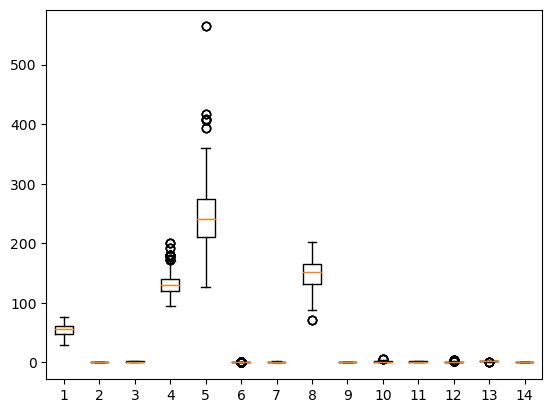

In [13]:
plt.boxplot(dfheart)
plt.show()

<Axes: >

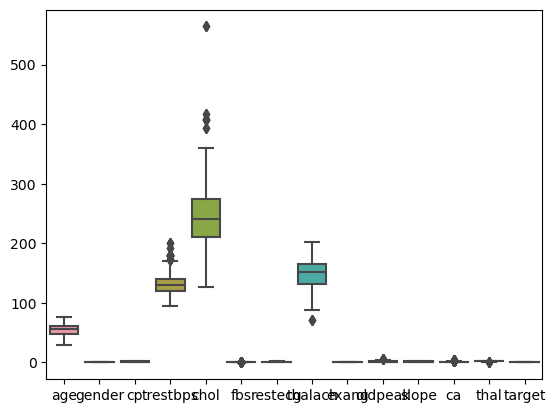

In [15]:
sns.boxplot(dfheart)

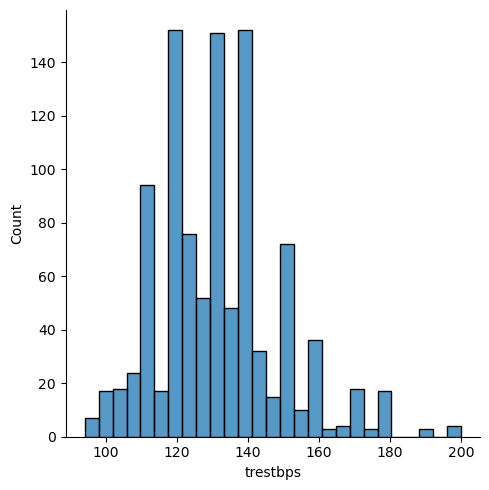

In [17]:
sns.displot(dfheart["trestbps"])

In [19]:
dfheart["trestbps"].skew()

0.739768226050074

In [20]:
q1 = dfheart["trestbps"].quantile(0.25)

In [21]:
q1

120.0

In [22]:
q3 = dfheart["trestbps"].quantile(0.75)
q3

140.0

In [24]:
iqr = q3 - q1
iqr

20.0

In [26]:
lower = q1 - (1.5*iqr)
lower

90.0

In [27]:
upper = q3 + (1.5 * iqr)
q3

140.0

In [29]:
dfheart["trestbps"].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

In [30]:
for i in dfheart:
    skew1=dfheart[i].skew().round()
    if skew1!=0:
        q1=dfheart[i].quantile(0.25)
        q3=dfheart[i].quantile(0.75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        dfheart[i]=dfheart[i].map(lambda x:lower if x<lower else upper if x>upper else x)
    else:
        m=dfheart[i].mean()
        st=dfheart[i].std()
        low=m-3*st
        high=m+3*st
        dfheart[i]=dfheart[i].map(lambda x:low if x<low else high if x>high else x)

In [44]:
x = dfheart.drop("target",axis =1)

In [45]:
x

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0


In [46]:
y = dfheart["target"]

In [47]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state= 42)

In [51]:
x.shape, x_train.shape, x_test.shape

((1025, 13), (820, 13), (205, 13))

In [52]:
y.shape, y_train.shape, y_test.shape

((1025,), (820,), (205,))

In [54]:
x_train.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118.0,149.0,0.0,0,126.0,0,0.8,2,2.5,2.0
137,64,0,0,170.0,325.0,0.0,1,154.0,1,0.0,2,0.0,2.0
534,54,0,2,108.0,267.0,0.0,0,167.0,0,0.0,2,0.0,2.0
495,59,1,0,135.0,234.0,0.0,1,161.0,0,0.5,1,0.0,3.0
244,51,1,2,125.0,245.0,0.0,0,166.0,0,2.4,1,0.0,2.0


In [55]:
x_test.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124.0,209.0,0.0,1,163.0,0,0.0,2,0.0,2.0
359,53,0,2,128.0,216.0,0.0,0,115.0,0,0.0,2,0.0,0.5
447,55,1,0,160.0,289.0,0.0,0,145.0,1,0.8,1,1.0,3.0
31,50,0,1,120.0,244.0,0.0,1,162.0,0,1.1,2,0.0,2.0
621,48,1,0,130.0,256.0,0.0,0,150.0,1,0.0,2,2.0,3.0


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtmodel = DecisionTreeClassifier()

In [39]:
dtmodel

DecisionTreeClassifier()

In [56]:
dtmodel.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
dtmodel.score(x_test, y_test)

0.9853658536585366

In [62]:
dtmodel1 = DecisionTreeClassifier(criterion = 'entropy')

In [63]:
dtmodel1

DecisionTreeClassifier(criterion='entropy')

In [64]:
dtmodel1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
dtmodel1.score(x_test, y_test)

0.9853658536585366

In [66]:
from sklearn.tree import plot_tree 

In [69]:
from matplotlib.pylab import rcParams

In [70]:
rcParams['figure.figsize'] = 60,40

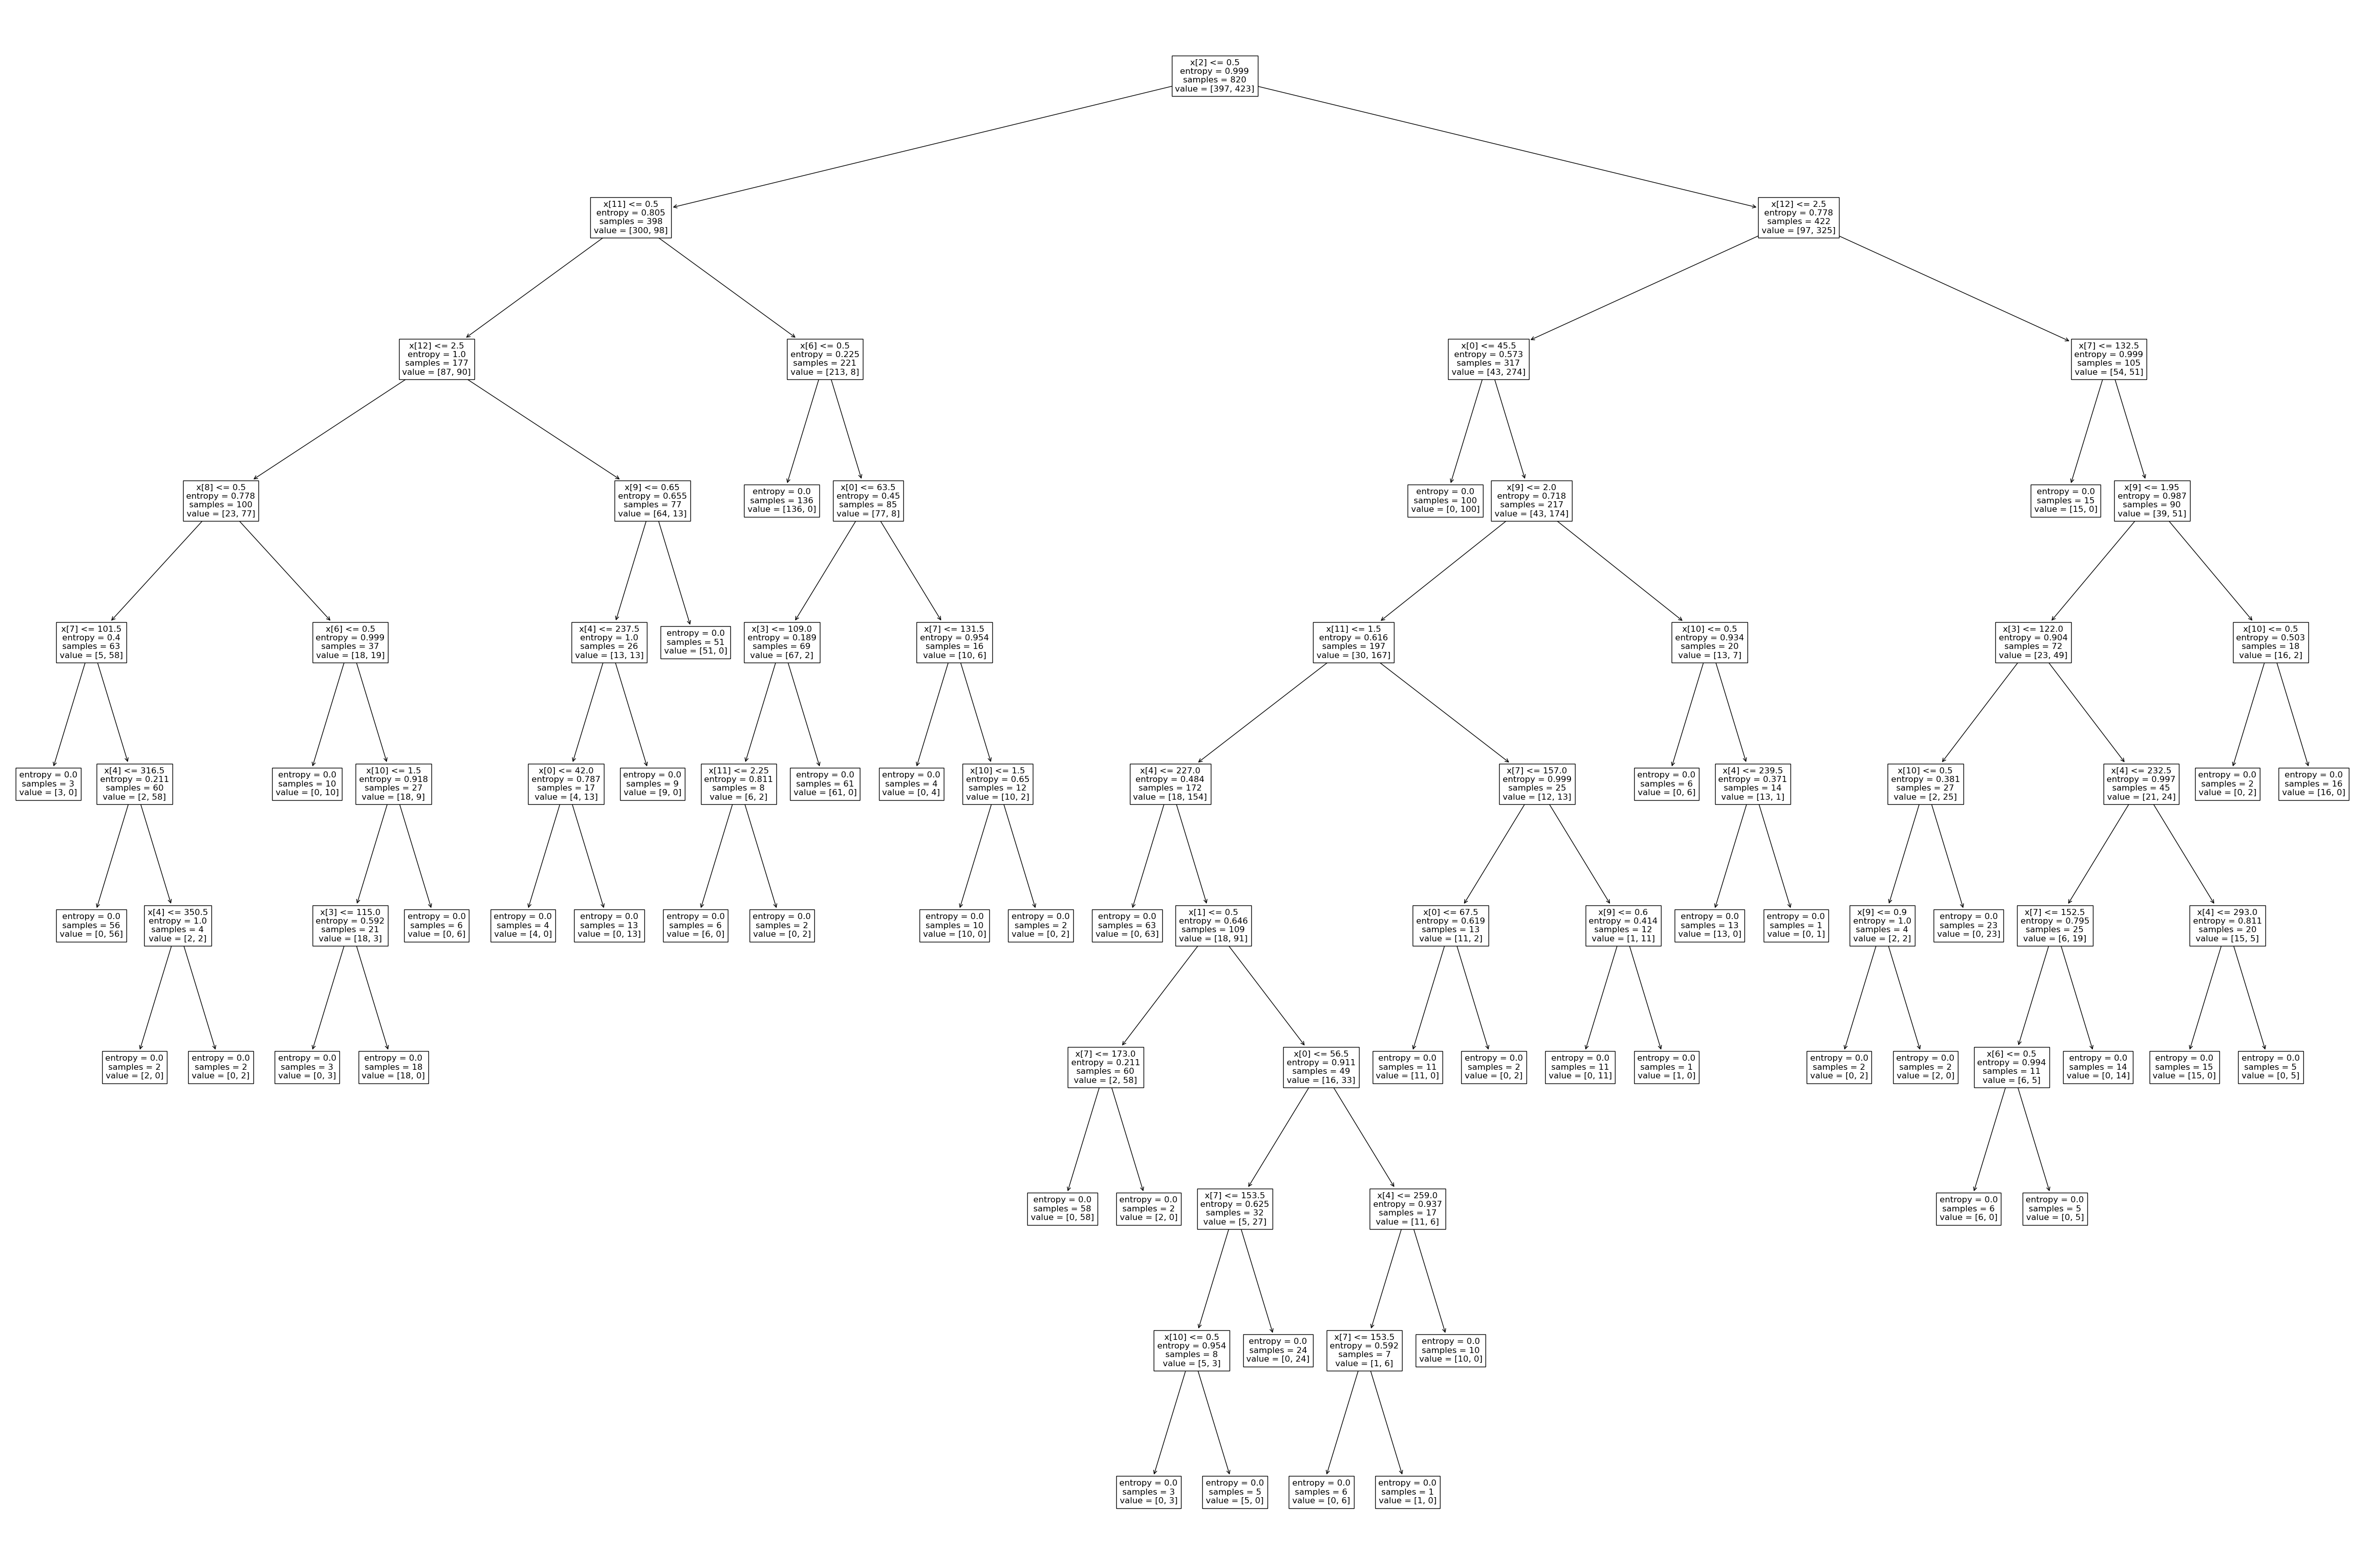

In [71]:
plot_tree(dtmodel1)
plt.show()